In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("medical.txt",delimiter = ",")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140  

In [3]:
data1 = data.copy()

In [5]:
data1['bmi'] = data1['weight']/((data1['height']/100)**2)
data1['overweight'] = 0

#data1['overweight'] = data1[1 if data1['bmi']>25 else 0]
print(data1.info())

for i in data1.index:
    if data1['bmi'][i]>25:
        data1['overweight'][i] = 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  bmi          70000 non-null  float64
 14  overweight   70000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 8.0 MB
None


In [6]:
to_be_plotted = pd.array(['active','alco','cholesterol','gluc','overweight','smoke'])
to_be_norm = pd.array(['cholesterol','gluc'])

In [7]:
#normalization
data2 = data1.copy()
for i in to_be_norm:
    for j in range(data1.shape[0]):
        if data1[i][j]==1:
            data1[i][j]=0
        elif data1[i][j]>1:
            data1[i][j]=1

In [ ]:
#sns.catplot(x="gluc",col="cardio",kind="count",data=data1)

In [19]:
#wide to long
data3 = data1.melt(id_vars='cardio',value_vars=to_be_plotted,var_name="variable")

In [20]:
#sns.catplot(data=data3,)
print(data3.info())
print(data3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420000 entries, 0 to 419999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   cardio    420000 non-null  int64 
 1   variable  420000 non-null  object
 2   value     420000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.6+ MB
None
   cardio variable  value
0       0   active      1
1       1   active      1
2       1   active      0
3       1   active      1
4       0   active      0


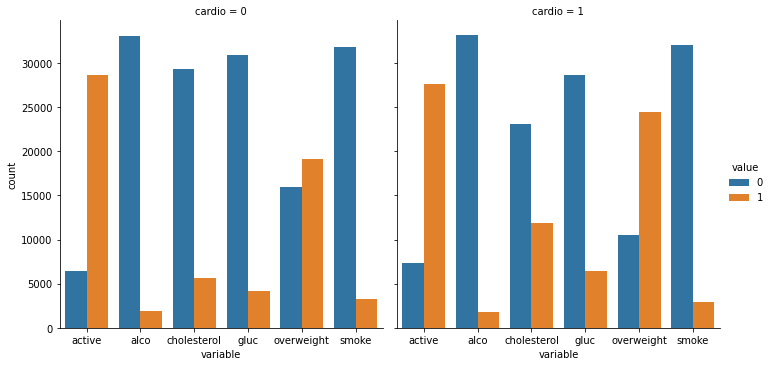

In [26]:
sns.catplot(data=data3,x='variable',hue='value',col='cardio',kind="count")